In [16]:
import numpy as np
import matplotlib.pyplot as plt

###  Implementation

In [17]:
class KNN:
    def __init__(self, K, distance):
        self.X_train = None
        self.y_train = None
        self.K = K
        self.distance = 'Euclidean'
    
    def _distance(self, x_test):
        choice = self.distance
        if choice == 'Euclidean':
            dist = np.sum((x_test-self.X_train)**2, axis=1)
            return np.sqrt(dist)
        if choice == 'Manhattan':
            dist = np.sum(np.abs(x_test-self.X_train), axis=1)
            return dist
        if choice == "Chebyshev":
            dist = np.max(np.abs(x_test-self.X_train), axis=1)
            return dist
        if choice == 'Cosine_similarity':
            numerator = np.sum(x_test*self.X_train, axis=1)
            denumerator = np.sqrt(np.sum(x_test**2)) * np.sqrt(np.sum(self.X_train**2, axis=1))
            dist = numerator / denumerator
            return dist 
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
        Y_pred = np.array([], dtype=int)
        for test in X:
            # calculate the distance between one of the test point to all the training points
            dist = self._distance(test)
            matrix = np.concatenate((self.y_train.reshape(self.y_train.shape[0],1),
                                     dist.reshape(dist.shape[0],1)), axis=1)
            matrix_sort = matrix[matrix[:,1].argsort()]
            k_neighbors = matrix_sort[:self.K,0]
            (values, counts) = np.unique(k_neighbors.astype(int), return_counts=True)
            y_pred = values[np.argmax(counts)]
            Y_pred = np.append(Y_pred, y_pred)
        return Y_pred


### Evaluation

- We apply our k-nearest neighbor method on iris dataset for classification and compare our method with sklearn

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [19]:
iris = load_iris()
X = iris.data
y = iris.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2020)

In [21]:
knn = KNN(K=5, distance='Euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [22]:
accuracy_test = sum(y_test == y_pred) / len(y_test)
print("The testing acuracy is {}".format(accuracy_test))

The testing acuracy is 0.9


### Compare with sklearn

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [25]:
accuracy_test = sum(y_test == y_pred) / len(y_test)
print("The testing acuracy is {}".format(accuracy_test))

The testing acuracy is 0.9


### Visualize the results by using only two features

In [26]:
X = iris.data[:,:2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2020)

In [27]:
knn = KNN(K=5, distance='Euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

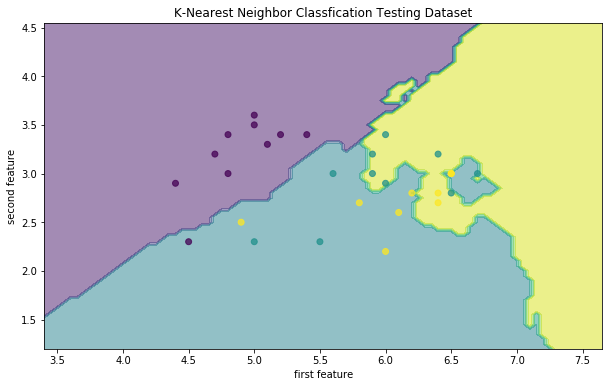

In [28]:
# Visulize the testing set results 
x0_features = np.arange(X_test[:, 0].min() - 1, X_test[:, 0].max() + 1, 0.05)
x1_features = np.arange(X_test[:, 1].min() - 1, X_test[:, 1].max() + 1, 0.05)
x0_features, x1_features = np.meshgrid(x0_features, x1_features)
X_grid = np.column_stack((x0_features.flatten(), x1_features.flatten()))
grid_pred = knn.predict(X_grid)
grid_pred = grid_pred.reshape(x0_features.shape)
fig = plt.figure(figsize=(10,6))
plt.contourf(x0_features, x1_features, grid_pred, alpha=0.5)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.75)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.title("K-Nearest Neighbor Classfication Testing Dataset")
plt.show()

In [29]:
# compare with sklearn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

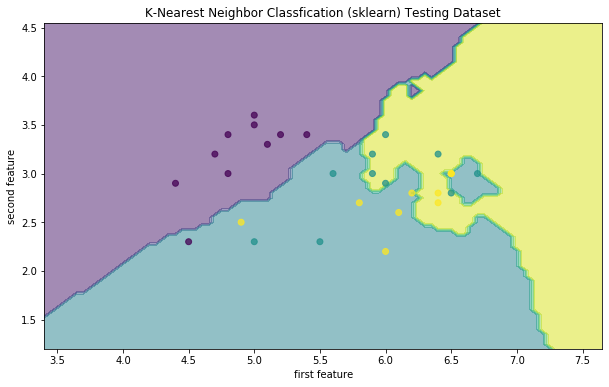

In [30]:
# Visulize the testing set results 
x0_features = np.arange(X_test[:, 0].min() - 1, X_test[:, 0].max() + 1, 0.05)
x1_features = np.arange(X_test[:, 1].min() - 1, X_test[:, 1].max() + 1, 0.05)
x0_features, x1_features = np.meshgrid(x0_features, x1_features)
X_grid = np.column_stack((x0_features.flatten(), x1_features.flatten()))
grid_pred = knn.predict(X_grid)
grid_pred = grid_pred.reshape(x0_features.shape)
fig = plt.figure(figsize=(10,6))
plt.contourf(x0_features, x1_features, grid_pred, alpha=0.5)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.75)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.title("K-Nearest Neighbor Classfication (sklearn) Testing Dataset")
plt.show()